In [6]:
# 5.16 Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [7]:
>>> conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [8]:
# 5.17 Extracting features using the pretrained convolutional base

import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/eddie/Documents/Deep_Learning_Keras/Chapter_5/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Listing 5.18 Defining and training the denseley connected classifier

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5748 - acc: 0.6990 - val_loss: 0.4213 - val_acc: 0.8580
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4151 - acc: 0.8135 - val_loss: 0.3519 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3496 - acc: 0.8535 - val_loss: 0.3209 - val_acc: 0.8800
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3067 - acc: 0.8840 - val_loss: 0.2958 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2851 - acc: 0.8770 - val_loss: 0.2830 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2561 - acc: 0.9030 - val_loss: 0.2733 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2437 - acc: 0.9060 - val_loss: 0.2662 - val_acc: 0.8970
Epoch 8/30
200

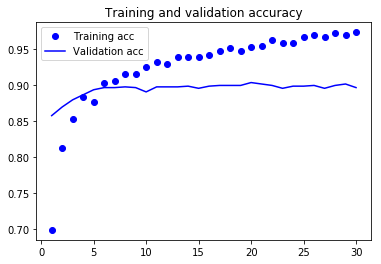

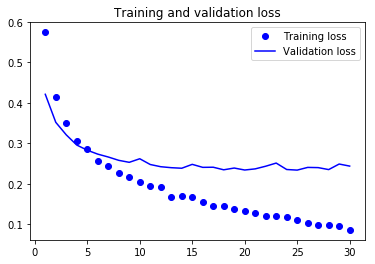

In [11]:
# Listing 5.19 Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Note: Did not continue with the feature extraction with data augmentation as it is intractable on CPU